In [8]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import os
import random

# Path to the image folder
image_folder = "C:/Users/admin/Downloads/DRD Dataset"

# Function to count images in folder
def count_images(folder):
    image_count = 0
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_count += 1
    return image_count

# Get number of images
num_images = count_images(image_folder)

print("Number of images:", num_images)


Number of images: 1505


In [10]:


# Path to the dataset directory
dataset_dir = "C:/Users/admin/Downloads/DRD Dataset"

# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            label = filename.split("_")[0]  # Extracting label from filename
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, (224, 224))  # Resize image to (224, 224)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images(dataset_dir)

In [11]:

X = images.reshape(images.shape[0], -1)


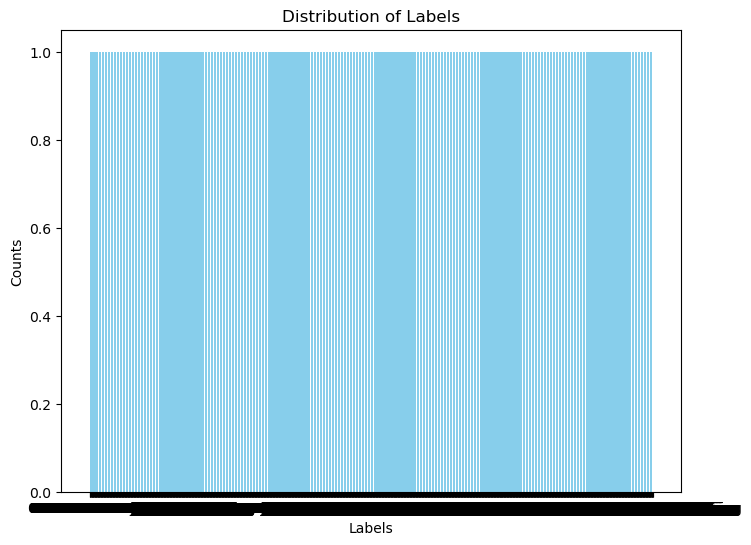

In [12]:
# Visualizing the patterns through graphs
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, label_counts, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels')
plt.show()

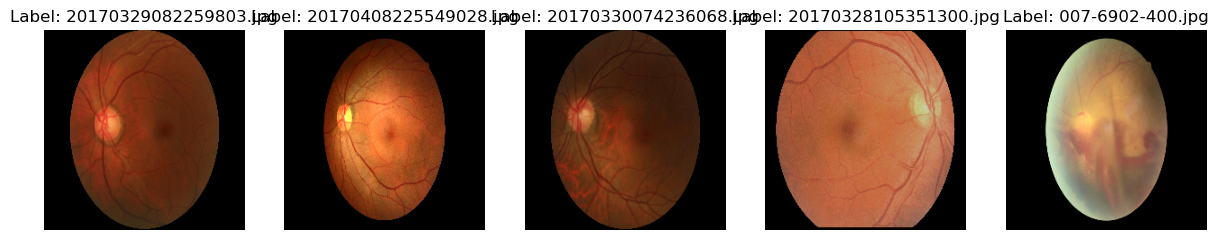

Some relations based on the images:
Image 709 has label: 20170329082259803.jpg
Image 1258 has label: 20170408225549028.jpg
Image 780 has label: 20170330074236068.jpg
Image 673 has label: 20170328105351300.jpg
Image 0 has label: 007-6902-400.jpg


In [13]:

# Visualizing sample images and printing relations
num_samples = 5
sample_indices = random.sample(range(len(images)), num_samples)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(images[idx])
    plt.title(f"Label: {labels[idx]}")
    plt.axis('off')

plt.show()

# Print some relations based on the images (you can customize this based on your analysis)
print("Some relations based on the images:")
for idx in sample_indices:
    print(f"Image {idx} has label: {labels[idx]}")

In [24]:


# Path to the dataset directory
dataset_dir = "C:/Users/admin/Downloads/DRD Dataset"

# Function to load and preprocess a subset of images
def load_subset_images(directory, num_images):
    images = []
    labels = []
    filenames = os.listdir(directory)
    selected_filenames = np.random.choice(filenames, size=num_images, replace=False)
    for filename in selected_filenames:
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            label = filename.split("_")[0]  # Extracting label from filename
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load a subset of images and labels
num_images = np.random.randint(10, 21)  # Randomly choose between 10 and 20 images
images, labels = load_subset_images(dataset_dir, num_images)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Generate random labels for demonstration (replace this with your actual labels)
y_train = np.random.randint(2, size=num_images)  # Random binary labels for demonstration

# Train the model
model.fit(images, y_train, epochs=10, batch_size=4)  # Reduced number of epochs and batch size for faster training

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.4600 - loss: 1.0858
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6378 - loss: 0.6176
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8185 - loss: 0.4090
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.8957 - loss: 0.2850
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 1.0000 - loss: 0.2099
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - loss: 0.1204
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 1.0000 - loss: 0.0906
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 1.0000 - loss: 0.0727
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 1.0000 - loss: 0.0745
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 1.0000 - loss: 0.0506


In [25]:
# Predict probabilities on the subset of images
predicted_probabilities = model.predict(images)

# Threshold probability for classification (e.g., 0.5)
threshold = 0.5

# Classify images based on predicted probabilities
classified_images = [(img, label, prob) for img, label, prob in zip(images, labels, predicted_probabilities) if prob > threshold]

# Print the classification results
for img, label, prob in classified_images:
    if label == 'DR':
        print(f"Image classified as having Diabetic Retinopathy with probability: {prob}")
    else:
        print(f"Image classified as not having Diabetic Retinopathy with probability: {prob}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image classified as not having Diabetic Retinopathy with probability: [0.99407494]
Image classified as not having Diabetic Retinopathy with probability: [0.9787743]
Image classified as not having Diabetic Retinopathy with probability: [0.960719]
Image classified as not having Diabetic Retinopathy with probability: [0.9442141]
Image classified as not having Diabetic Retinopathy with probability: [0.9950488]
Image classified as not having Diabetic Retinopathy with probability: [0.9657906]
Image classified as not having Diabetic Retinopathy with probability: [0.9902582]
Image classified as not having Diabetic Retinopathy with probability: [0.99110997]
Image classified as not having Diabetic Retinopathy with probability: [0.98606694]
Image classified as not having Diabetic Retinopathy with probability: [0.9674095]
Image classified as not having Diabetic Retinopathy with probability: [0.9953739]


<Figure size 1500x800 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


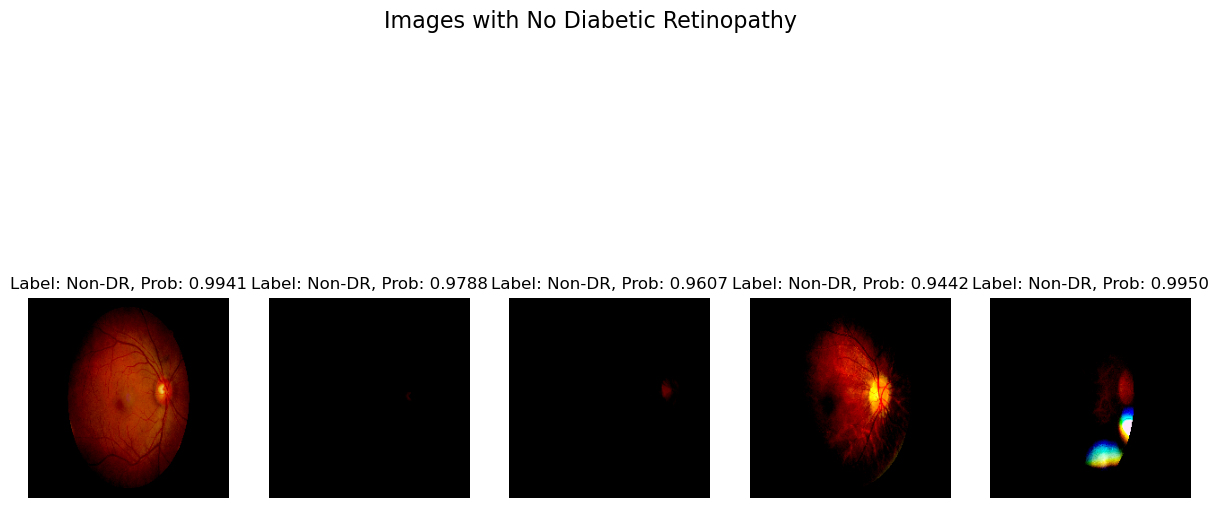

In [26]:

# Define a function to display images
def plot_images(images, labels, probabilities, class_label):
    plt.figure(figsize=(15, 8))
    num_images = min(5, len(images))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}, Prob: {probabilities[i]:.4f}")
        plt.axis('off')
    plt.suptitle(f"Images with {class_label}", fontsize=16)
    plt.show()

# Extract images classified as having Diabetic Retinopathy
dr_images = [img for img, label, prob in classified_images if label == 'DR']
dr_labels = ['DR'] * len(dr_images)
dr_probabilities = [prob[0] for img, label, prob in classified_images if label == 'DR']

# Extract images classified as not having Diabetic Retinopathy
non_dr_images = [img for img, label, prob in classified_images if label != 'DR']
non_dr_labels = ['Non-DR'] * len(non_dr_images)
non_dr_probabilities = [prob[0] for img, label, prob in classified_images if label != 'DR']

# Plot images with diabetic retinopathy
plot_images(dr_images, dr_labels, dr_probabilities, "Diabetic Retinopathy")

# Plot images without diabetic retinopathy
plot_images(non_dr_images, non_dr_labels, non_dr_probabilities, "No Diabetic Retinopathy")

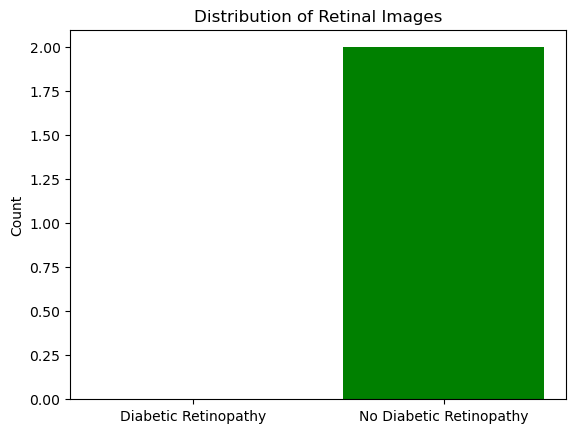

In [29]:

# Count the number of images classified as having Diabetic Retinopathy and not having it
num_dr_images = sum(1 for label in labels if label == 'DR')
num_non_dr_images = len(labels) - num_dr_images

# Plot the distribution of images
labels = ['Diabetic Retinopathy', 'No Diabetic Retinopathy']
counts = [num_dr_images, num_non_dr_images]

plt.bar(labels, counts, color=['blue', 'green'])
plt.ylabel('Count')
plt.title('Distribution of Retinal Images')
plt.show()